**Tarea: Creación de un modelo de clasificación para predecir problemas en procesos de un servidor**

In [55]:
## Importar librerias y funciones

import pandas as pd  # Libreria para manipulación y análisis de datos
import numpy as np   # Librería para cálculo numérico y operaciones con arreglos
import matplotlib.pyplot as plt  # Librería para crear gráficos y visualizaciones
import seaborn as sns  # Librería para visualizaciones estadísticas
from sklearn.model_selection import train_test_split  # Función para dividir datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Escalador para normalizar características

**1. Análisis Exploratorio de Datos (EDA)**:
Se usa para examinar un conjunto de datos, entender su estructura, identificar patrones y detectar valores faltantes antes de aplicar modelos de Machine Learning

In [56]:
## Cargar la data del archivo CSV
df = pd.read_csv('datos_procesos.csv',sep='|') # Lee el archivo CSV, especificando el separador
pd.set_option('display.max_columns', None) # Muestra todas las columnas que tiene la data
df.head() # muestra las primeras 5 filas de la data

,ID_Proceso,Uso_CPU,Uso_Memoria,Numero_Hilos,Tiempo_Ejecucion,Numero_Errores,Tipo_Proceso,Estado
0,1,37.454012,59.515562,16,8.184879,3,Aplicación,0
1,2,95.071431,36.471714,18,76.195256,8,Aplicación,0
2,3,73.199394,0.537562,21,46.991138,3,Aplicación,0
3,4,59.865848,56.108773,28,87.884325,4,Aplicación,0
4,5,15.601864,89.657041,39,4.622599,1,Sistema,0


In [57]:
# Solo muestra estadística descriptiva de las columnas numéricas
df.describe()

,ID_Proceso,Uso_CPU,Uso_Memoria,Numero_Hilos,Tiempo_Ejecucion,Numero_Errores,Estado
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,50.033449,49.947866,25.030640,50.043250,5.003483,0.064631
std,288675.278932,28.859113,28.851514,14.150159,28.829111,2.237005,0.245874
min,1.000000,0.000052,0.000038,1.000000,0.100083,0.000000,0.000000
25%,250000.750000,25.034021,24.999623,13.000000,25.074789,3.000000,0.000000
50%,500000.500000,50.055597,49.895350,25.000000,50.040186,5.000000,0.000000
75%,750000.250000,75.009673,74.924148,37.000000,75.030119,6.000000,0.000000
max,1000000.000000,99.999831,99.999938,49.000000,99.999992,19.000000,1.000000


In [58]:
# muestra la cantidad de valores nulos por columna si los hay
df.isnull().sum()

ID_Proceso          0
Uso_CPU             0
Uso_Memoria         0
Numero_Hilos        0
Tiempo_Ejecucion    0
Numero_Errores      0
Tipo_Proceso        0
Estado              0
dtype: int64

In [59]:
# cuenta cuantas veces aparece cada valor en la columna Estado
df['Estado'].value_counts()

Estado
0    935369
1     64631
Name: count, dtype: int64

In [60]:
# Cuenta el número total de duplicados
df.duplicated().sum()

np.int64(0)

**2. Preprocesamiento de datos**:
Es el proceso de preparar y limpiar los datos (eliminar duplicados, manejar valores nulos, convertir categorías) antes de aplicar un modelo de Machine Learning.

In [61]:
# Se aplica One-Hot Encoding para convertir la columna de texto en variable numérica
proceso= pd.get_dummies(df, columns=['Tipo_Proceso'])
proceso

,ID_Proceso,Uso_CPU,Uso_Memoria,Numero_Hilos,Tiempo_Ejecucion,Numero_Errores,Estado,Tipo_Proceso_Aplicación,Tipo_Proceso_Servicio,Tipo_Proceso_Sistema
0,1,37.454012,59.515562,16,8.184879,3,0,True,False,False
1,2,95.071431,36.471714,18,76.195256,8,0,True,False,False
2,3,73.199394,0.537562,21,46.991138,3,0,True,False,False
3,4,59.865848,56.108773,28,87.884325,4,0,True,False,False
4,5,15.601864,89.657041,39,4.622599,1,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...
999995,999996,88.808083,46.057947,29,27.258890,4,0,False,True,False
999996,999997,43.731876,90.516047,36,5.368654,7,0,False,False,True
999997,999998,41.807198,68.311082,9,63.019433,4,0,False,False,True
999998,999999,42.867126,33.865907,48,4.543244,8,0,False,True,False


**3.Selección y División del conjunto de datos**

In [62]:
df_dummies = pd.get_dummies(df['Tipo_Proceso'], prefix='Tipo_Proceso')
df_dummies = df_dummies.astype(int) #Reemplaza los valores true/false por 1/0
df_final = pd.concat([df.drop(columns=['Tipo_Proceso']), df_dummies], axis=1) #concatena las columnas del df excluyendo la Tipo_Proceso
df_final

,ID_Proceso,Uso_CPU,Uso_Memoria,Numero_Hilos,Tiempo_Ejecucion,Numero_Errores,Estado,Tipo_Proceso_Aplicación,Tipo_Proceso_Servicio,Tipo_Proceso_Sistema
0,1,37.454012,59.515562,16,8.184879,3,0,1,0,0
1,2,95.071431,36.471714,18,76.195256,8,0,1,0,0
2,3,73.199394,0.537562,21,46.991138,3,0,1,0,0
3,4,59.865848,56.108773,28,87.884325,4,0,1,0,0
4,5,15.601864,89.657041,39,4.622599,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
999995,999996,88.808083,46.057947,29,27.258890,4,0,0,1,0
999996,999997,43.731876,90.516047,36,5.368654,7,0,0,0,1
999997,999998,41.807198,68.311082,9,63.019433,4,0,0,0,1
999998,999999,42.867126,33.865907,48,4.543244,8,0,0,1,0


**4.Construcción y evaluación de modelos**

**Regresión Logistica en Python**

Para hacer una regresión logistica en python, vamos a usar scikit-learn, que es una librería de python para aprendizaje automático.

El primer paso que daremos será el de importar las librerías que vamos utilizar, en especial las necesarias para importar los datos que utilizaremos.

En este caso vamos a importar de sklearn el datasets, que es donde se guardan todos los conjuntos de datos que dispone esta librería.

In [63]:
#Regresion Logistica
#Se importan la librerias a utilizar
import pandas as pd  # Libreria para manipulación y análisis de datos
import numpy as np   # Librería para cálculo numérico y operaciones con arreglos
import matplotlib.pyplot as plt  # Librería para crear gráficos y visualizaciones
import seaborn as sns # es una librería de visualización de datos
from sklearn.model_selection import train_test_split #Ayuda a dividir los datos en dos conjuntos: uno para entrenar el modelo y otro para probarlo.
from sklearn.preprocessing import StandardScaler #Sirve para normalizar los datos
from sklearn.linear_model import LogisticRegression #Importa la herramienta para crear un modelo de regresión logística
from sklearn.metrics import confusion_matrix #se utiliza para evaluar el desempeño de un modelo de clasificación
from sklearn.metrics import precision_score #se utiliza para calcular la precisión de un modelo de clasificación
from sklearn.metrics import accuracy_score # se utiliza para calcular la precisión global o exactitud de un modelo de clasificación

In [64]:
#cargar el conjunto de datos
dataset = df_final
dataset

,ID_Proceso,Uso_CPU,Uso_Memoria,Numero_Hilos,Tiempo_Ejecucion,Numero_Errores,Estado,Tipo_Proceso_Aplicación,Tipo_Proceso_Servicio,Tipo_Proceso_Sistema
0,1,37.454012,59.515562,16,8.184879,3,0,1,0,0
1,2,95.071431,36.471714,18,76.195256,8,0,1,0,0
2,3,73.199394,0.537562,21,46.991138,3,0,1,0,0
3,4,59.865848,56.108773,28,87.884325,4,0,1,0,0
4,5,15.601864,89.657041,39,4.622599,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
999995,999996,88.808083,46.057947,29,27.258890,4,0,0,1,0
999996,999997,43.731876,90.516047,36,5.368654,7,0,0,0,1
999997,999998,41.807198,68.311082,9,63.019433,4,0,0,0,1
999998,999999,42.867126,33.865907,48,4.543244,8,0,0,1,0


In [65]:
#Definir las variables
x = df_final.drop(columns='Estado') # x es el DataFrame sin la columna 'Estado'
y = df_final['Estado'] # y es solo la columna 'Estado'

In [66]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16 )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800000, 9)
(200000, 9)
(800000,)
(200000,)


In [67]:
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)  ## Encontrar la media y varianza
X_test = escalar.transform(X_test)

In [68]:
# Desarrollo del Training
model = LogisticRegression()

## antes del entrenamiento
model.fit(X_train, y_train)  ##Entranamiento


LogisticRegression()

In [69]:
#Realizamos una predicción
print(X_test.shape)
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred)

## predict_proba(X)

(200000, 9)
(200000,)
[0 0 0 ... 0 0 0]


In [70]:
#Evaluando el resultado del modelo
#Verifico la matriz de Confusión
print(y_test.shape)
print(y_pred.shape)

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

(200000,)
(200000,)
Matriz de Confusión:
[[184608   2585]
 [  5792   7015]]


In [71]:
#Precision del modelo
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.7307291666666667


In [72]:
#Exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.958115


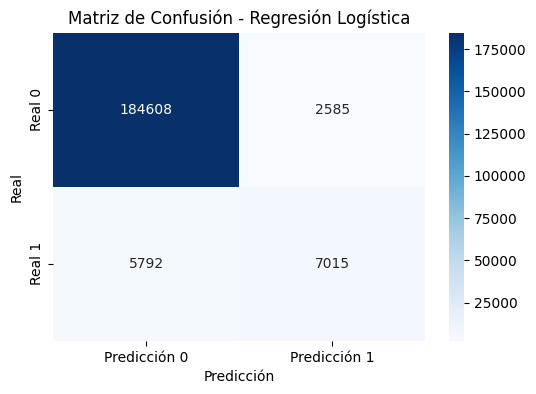

In [73]:
# Crear la gráfica de calor usando Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicción 0', 'Predicción 1'], yticklabels=['Real 0', 'Real 1'])

# Añadir título y etiquetas
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

**Interpretación de resultados:**

Matriz de Confusión:
- 184608 (Verdaderos Negativos - TN): El modelo predijo correctamente que 184,608 casos eran negativos (la clase que representa "0").

- 2585 (Falsos Positivos - FP): El modelo predijo incorrectamente que 2,585 casos eran positivos cuando en realidad eran negativos.

- 5792 (Falsos Negativos - FN): El modelo predijo incorrectamente que 5,792 casos eran negativos cuando en realidad eran positivos.

- 7015 (Verdaderos Positivos - TP): El modelo predijo correctamente que 7,015 casos eran positivos (la clase que representa "1").

Por lo que, el 73,07% de estas predicciones fueron correctas

La exactitud del modelo es del 95,8%

**Regresión con Árboles de Decisión**

Los árboles de decisión son un tipo de modelo de regresión y clasificación que se basan en la estructura de un árbol. El `DecisionTreeRegressor` es específico para problemas de regresión y se utiliza para predecir valores numéricos en función de características de entrada.

**Ventajas y Desventajas**

- **Interpretabilidad*: Los árboles de decisión son fáciles de interpretar y visualizar. Puedes seguir el camino de decisiones para entender cómo se hace una predicción.

- **No linealidad*: Los árboles pueden capturar relaciones no lineales en los datos, lo que los hace útiles cuando las relaciones entre variables no son simples.

- **Sensibilidad al Ruido*: Los árboles pueden ser sensibles al ruido y al sobreajuste si no se controla la profundidad o si se crean árboles demasiado complejos.

In [74]:
#Importar librerias
from sklearn.tree import DecisionTreeRegressor #es un modelo de regresión que utiliza un árbol de decisión para predecir un valor numérico
from sklearn.model_selection import train_test_split # se usa para dividir un conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba
from sklearn.metrics import mean_squared_error # se utiliza para calcular el error cuadrático medio (MSE, por sus siglas en inglés) entre las predicciones de un modelo y los valores reales (verdaderos)

In [75]:
#Definir las variables
x = df_final.drop(columns='Estado') # x es el DataFrame sin la columna 'Estado'
y = df_final['Estado'] # y es solo la columna 'Estado'

In [76]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16 )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800000, 9)
(200000, 9)
(800000,)
(200000,)


In [77]:
# Crear el modelo de árbol de decisión
model1 = DecisionTreeRegressor()

In [78]:
# Entrenar el modelo
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
# Realizar predicciones en el conjunto de prueba
y_pred = model1.predict(X_test)
print('Precisión del modelo:')
print(y_pred)

Precisión del modelo:
[0. 0. 0. ... 0. 0. 0.]


In [80]:
# Calcular la exactitud (porcentaje de predicción correcta)
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(accuracy)

Exactitud del modelo:
0.93813


In [81]:
    # Calcular el error cuadrático medio
    mse = mean_squared_error(y_test, y_pred)
    print("Error Cuadrático Medio:", mse)

Error Cuadrático Medio: 0.06187


**Interpretación de resultado**

- El resultado de la presición del modelo indica que todas las predicciones son del estado cero, esto puede pasar por que hay mas datos en la etapa 0 que 1, en otro caso el modelo tambien puede que no este aprendiendo correctamente la relacion de las caracteristicas.

- La exactitud del modelo es del 93,8% de las predicciones correctas, sobre el total de las realizadas. Sin embargo, puede que no este del todo correcto ya que no evaluo la Estado 1

- Se obtuvo un indice de clasificación del 6,17% lo que indica que los resultados estan bastante cerca de los reales. Sin embargo, al predecir solo el Estado 0 puede no ser precisa. 

**Visualizacion Cruzada**

Es una técnica de evaluación del modelo que permite verificar su desempeño de manera más robusta y confiable. Para optimizar los hiperparámetros de un modelo.

**Regresión Logistica**

In [82]:
from sklearn.model_selection import GridSearchCV, cross_val_score
#GridSearchCV realiza una búsqueda en cuadrícula de los mejores hiperparámetros evaluando cada combinación a través de validación cruzada

In [83]:
# Definir los valores de los hiperparámetros para optimizar
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularización
    'solver': ['liblinear', 'lbfgs'],  # Algoritmos de optimización
    'penalty': ['l1', 'l2'],  # Tipo de penalización
}

In [84]:
# Realizar búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Mejores parámetros encontrados: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [85]:
# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo en el conjunto de prueba: {accuracy:.4f}')

Precisión del modelo en el conjunto de prueba: 0.9581


In [86]:
# Evaluar el modelo con validación cruzada
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f'Precisión promedio en validación cruzada: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

Precisión promedio en validación cruzada: 0.9577 ± 0.0005


**Interpretación**

- C=1: Es el valor que mejor optimiza el rendimiento del modelo en la validación cruzada
- Penalty='l1': Es la mejor penalización
- solver='liblinear': El mejor algoritmo de optimización
- El modelo tiene una precisión del 95,78% en el conjunto de prueba
- La precisión promedio en la validación cruzada es del 95,77%

**Arbol de decisión**

In [87]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [88]:
# Definir los valores de los hiperparámetros para optimizar
param_grid = {
    'max_depth': [None, 10],  # Reduce la cantidad de profundidades a probar
    'min_samples_split': [2, 5],  # Reduce el número de muestras para la división
    'min_samples_leaf': [1, 2],  # Reduce el número de muestras en una hoja
    'criterion': ['squared_error'],  # Utiliza solo un criterio
}

In [89]:
# Realizar búsqueda en cuadrícula con validación cruzada
grid_search1 = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search1.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search1.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Mejores parámetros encontrados: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [90]:
# Usar el mejor modelo encontrado
best_model = grid_search1.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) del modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio en el conjunto de prueba: {mse:.4f}')

Error cuadrático medio en el conjunto de prueba: 0.0315


In [91]:
# Calcular el error absoluto medio (MAE) del modelo
mae = mean_absolute_error(y_test, y_pred)
print(f'Error absoluto medio en el conjunto de prueba: {mae:.4f}')

Error absoluto medio en el conjunto de prueba: 0.0607


In [92]:
# Evaluar el modelo con validación cruzada
cv_scores = grid_search1.best_estimator_.score(X_train, y_train)
print(f'R² promedio en validación cruzada: {cv_scores:.4f}')

R² promedio en validación cruzada: 0.5128


**Interpretación**

- Squared_error: se usa para medir la calidad de las diversiones del arbol, es el error cuantico medio.
- max_depth:10 El arbol tiene una profundidad maxima de 10 niveles
- min_samples_leaf:2 Cada hoja del arbol debe tener al menos 2 muestras
- min_samples_split:5 para dividir un nodo en el arbol, debe haber al menos 5 muestras en este nodo
- Error cuadratico medio (MSE) en el conjunto de prueba 0,0315 indica que predice bien las salidas continuas
- Error absoluto medio (MAE) en el conjunto de prueba 0,0607 similar al MSE, indica que tiene un buen rendimiento en las predicciones
- R² promedio en validación cruzada 0.5128 significa que el modelo explica el 51,28% de la variabilidad de los datos